# Week 2: Tackle Overfitting with Data Augmentation

Welcome to this assignment! As in the previous week, you will be using the famous `cats vs dogs` dataset to train a model that can classify images of dogs from images of cats. For this, you will create your own Convolutional Neural Network in Tensorflow and leverage Keras' image preprocessing utilities, more so this time around since Keras provides excellent support for augmenting image data.

You will also need to create the helper functions to move the images around the filesystem as you did last week, so if you need to refresh your memory with the `os` module be sure to take a look a the [docs](https://docs.python.org/3/library/os.html).

Let's get started!

_**NOTE:** To prevent errors from the autograder, please avoid editing or deleting non-graded cells in this notebook . Please only put your solutions in between the `### START CODE HERE` and `### END CODE HERE` code comments, and refrain from adding any new cells._

In [ ]:
%pip install tensorflow

In [ ]:
%pip install matplotlib

In [1]:
# grader-required-cell

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

Now the images are stored within the `/tmp/PetImages` directory. There is a subdirectory for each class, so one for dogs and one for cats.

In [2]:
# grader-required-cell

source_path_dogs = 'train\Dog'

# source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = 'train\Cat'

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 15 images of dogs.
There are 15 images of cats.


**Expected Output:**

```
There are 12500 images of dogs.
There are 12500 images of cats.
```

You will need a directory for cats-v-dogs, and subdirectories for training
and validation. These in turn will need subdirectories for 'cats' and 'dogs'. To accomplish this, complete the `create_train_val_dirs` below:

In [3]:
TRAINING_DIR = "train/"
training_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)
num_train_data = train_generator.samples
print("Jumlah dataset pelatihan:", num_train_data)
val_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)
num_val_data = val_generator.samples
print("Jumlah dataset validasi:", num_val_data)


Found 36 images belonging to 3 classes.
Jumlah dataset pelatihan: 36
Found 9 images belonging to 3 classes.
Jumlah dataset validasi: 9


In [ ]:
%pip install Pillow

In [4]:
from PIL import Image
from keras.preprocessing.image import load_img
import os
from keras.preprocessing.image import ImageDataGenerator


In [27]:
model=tf.keras.models.Sequential([
# YOUR CODE HERE, end with 3 Neuron Dense, activated by softmax

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [28]:
class MyCustomCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            if logs['accuracy'] >0.83 and logs['val_accuracy'] >0.83:
                print("Validation accuracy and accuracy is up to 0.83. Stopping training.")
                self.model.stop_training = True

custom_callback = MyCustomCallback()




In [29]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
%pip install scipy


In [7]:
import scipy

In [30]:
history = model.fit(
        train_generator,
        epochs=50,
        # verbose=1,
        validation_data=val_generator,
        callbacks=[custom_callback]
    )

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.1192 - accuracy: 0.3333 - val_loss: 1.3558 - val_accuracy: 0.3333
Epoch 2/50
1/1 [==============================] - 1s 570ms/step - loss: 1.4768 - accuracy: 0.3333 - val_loss: 2.3432 - val_accuracy: 0.3333
Epoch 3/50
1/1 [==============================] - 1s 524ms/step - loss: 2.1946 - accuracy: 0.3333 - val_loss: 1.5737 - val_accuracy: 0.3333
Epoch 4/50
1/1 [==============================] - 1s 519ms/step - loss: 1.5630 - accuracy: 0.3333 - val_loss: 1.0371 - val_accuracy: 0.6667
Epoch 5/50
1/1 [==============================] - 1s 509ms/step - loss: 0.9826 - accuracy: 0.6667 - val_loss: 1.0074 - val_accuracy: 0.6667
Epoch 6/50
1/1 [==============================] - 1s 516ms/step - loss: 0.9744 - accuracy: 0.6389 - val_loss: 0.9670 - val_accuracy: 0.6667
Epoch 7/50
1/1 [==============================] - 1s 525ms/step - loss: 0.9038 - accuracy: 0.7222 - val_loss: 0.8450 - val_accuracy: 0.6667
Epoch 8/50
1/1 [=======

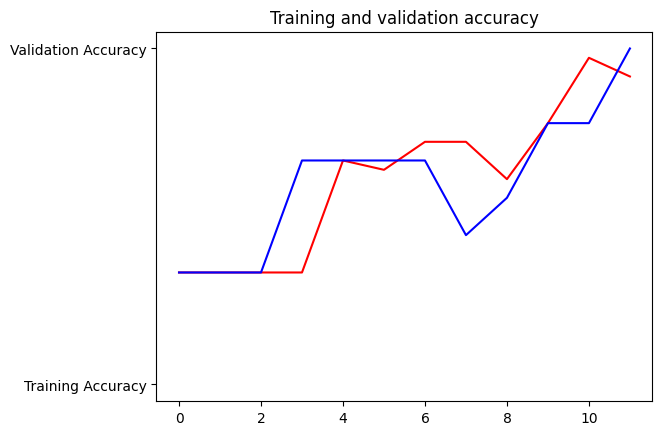

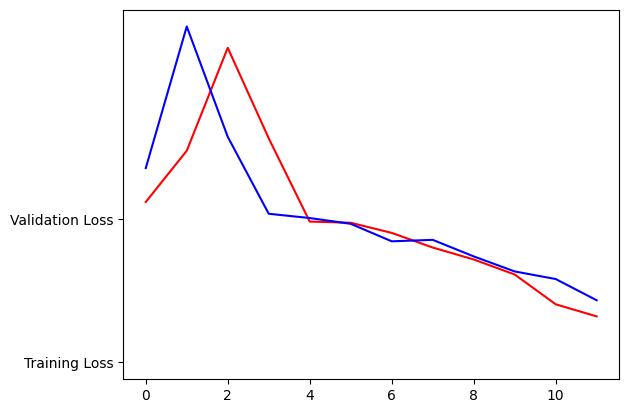

In [31]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [26]:
val_generator.class_indices

{'Ant': 0, 'Cat': 1, 'Dog': 2}

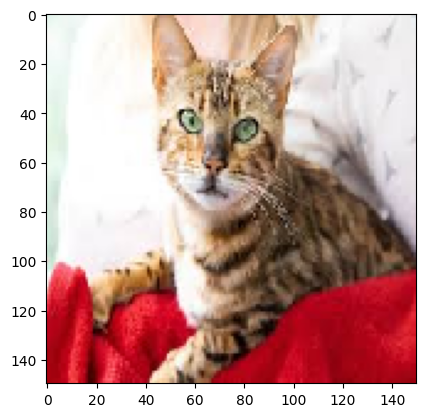

1/1 [==============================] - 0s 37ms/step
cat


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import numpy as np

# Load and preprocess the image
img_path = 'train\Cat\Cat_11.jpg'  # Replace with the path to your image file
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
# img_array = preprocess_input(img_array)
img_array = np.vstack([img_array])
# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
# decoded_predictions = decode_predictions(predictions, top=3)[0]
# print("Predictions:")
# for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
#     print(f"{i + 1}: {label} ({score:.2f})")

# # Optionally, you can use the top predicted class for further processing
# top_prediction = decoded_predictions[0]
# top_class = top_prediction[1]
# confidence = top_prediction[2]

# Now, you can use 'top_class' and 'confidence' for further processing or decision making.

if np.any(predictions) ==0 :
    print ("ant")
elif np.any(predictions)== 1:
    print ("cat")
else:
    print ("dog")



# {'Ant': 0, 'Cat': 1, 'Dog': 2}